c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status

排序后的数据评估结果（type=5分类）：
             layers activation solver  F1-avg  F1-std  Acc-avg  Acc-std
19  (50, 25, 12, 6)       relu   adam  0.3371  0.0423   0.3125   0.0248
13     (50, 50, 25)       relu   adam  0.1716  0.1717   0.7159   0.0612
11         (64, 32)       tanh  lbfgs  0.1218  0.1373   0.7784   0.0295
9   (50, 25, 12, 6)       relu  lbfgs  0.0938  0.1624   0.7216   0.1152
18     (50, 25, 12)       relu   adam  0.0685  0.0733   0.6818   0.1029
0      (50, 25, 12)       relu   adam  0.0685  0.0733   0.6818   0.1029
15        (100, 50)       tanh   adam  0.0455  0.0787   0.7670   0.0295
4      (50, 25, 12)       tanh  lbfgs  0.0417  0.0722   0.7784   0.0098
17     (50, 25, 12)       tanh  lbfgs  0.0417  0.0722   0.7784   0.0098
3      (50, 25, 12)       relu  lbfgs  0.0000  0.0000   0.7727   0.0394


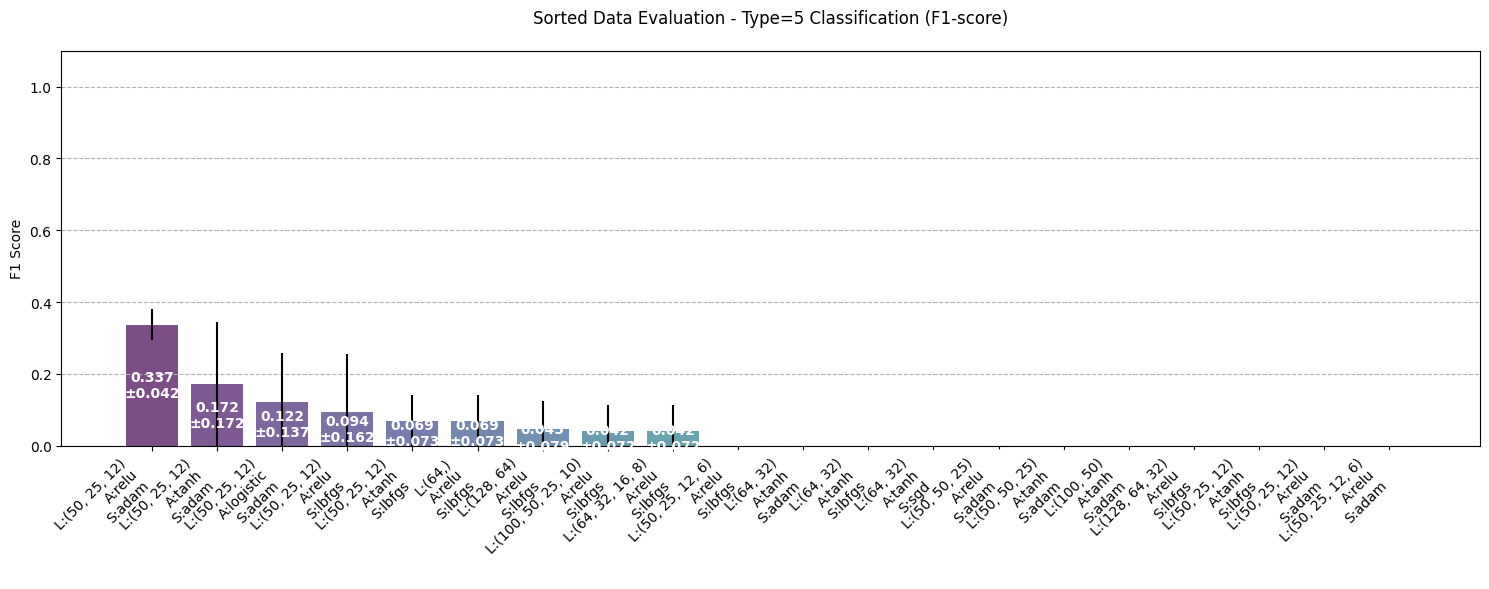

In [2]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_validate
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, f1_score

# # ==================== 数据加载部分 ====================
# try:
#     # 加载训练数据
#     train_data = pd.read_excel('Data_Set_(A+B).xlsx')
    
    
#     # 假设目标列名为 "Тип поверхностей 5"（请确认实际列名）
#     target_col = 'Type'  # 俄语列名
#     # 如果列名不同请修改为实际列名，例如：target_col = 'Surface_Type'
    
#     X = train_data.drop(columns=[target_col])
#     y = train_data[target_col]
    
#     print("数据加载成功！")
#     print(f"训练集样本数：{len(train_data)}")
#     print(f"特征数量：{X.shape[1]}")
#     print("\n类别分布：")
#     print(y.value_counts())

# except Exception as e:
#     print(f"数据加载失败：{str(e)}")
#     print("可能原因：")
#     print("1. 文件路径错误")
#     print("2. 列名不匹配（当前目标列名：'Тип поверхностей 5'）")
#     print("3. 文件格式错误")
#     exit()
import pandas as pd
import numpy as np
import os  # 新增导入os模块
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
# ========== 1. 数据排序（保持原始逻辑） ==========
# 读取原始数据
df = pd.read_excel("Data_Set_(A+B).xlsx")

# # 按目标变量排序
# df_sorted = df.sort_values(by="Type", ascending=False)

# # 保存排序结果到当前目录（修改点）
# df_sorted.to_csv("sorted_data.csv", index=False)  # 直接保存到当前目录

# # 重新加载排序后的数据（路径修改）
# df_sorted = pd.read_csv("sorted_data.csv")  # 从当前目录读取

# ========== 2. 数据准备 ==========
# 特征/目标分离
X = train_data.drop(columns=["Type"])  # 假设特征列不包含type列
y = (train_data["Type"] == 5).astype(int)  # 将type=5转为1，其他转为0

# # ==================== 模型配置（保持原结构） ====================
# model = MLPClassifier(
#     hidden_layer_sizes=(50,25,12),   # 隐藏层结构，改成 (100,), (50, 50), (100, 50, 25) 等试不同结构
#     activation='logistic',          # 激活函数,activation 换成 'tanh',relu,'logistic' 看是否更适合
#     solver='adam',              # 优化器adam,lbfgs,sgd
#     max_iter=500,               # 最大迭代次数
#     random_state=42,             # 固定随机种子
    
    
# )
# # ==================== 交叉验证 ====================
# scoring = {
#     'f1': 'f1_weighted',  # 使用加权平均处理多分类
#     'accuracy': 'accuracy'
# }
# scores = cross_validate(model, X, y, cv=4, scoring=scoring)

# # ==================== 结果输出 ====================
# print("\n交叉验证结果：")
# print(f"平均F1-score：{scores['test_f1'].mean():.3f} ± {scores['test_f1'].std():.3f}")
# print(f"平均准确率：{scores['test_accuracy'].mean():.3f} ± {scores['test_accuracy'].std():.3f}")

# print("\n各折详细结果：")
# print("F1-scores:", [f"{x:.3f}" for x in scores['test_f1']])
# print("Accuracies:", [f"{x:.3f}" for x in scores['test_accuracy']])

# # ==================== 可视化 ====================
# plt.figure(figsize=(10, 5))
# plt.boxplot([scores['test_f1'], scores['test_accuracy']], 
#             labels=['F1-score', 'Accuracy'],
#             patch_artist=True,
#             boxprops=dict(facecolor='lightblue'))
# plt.title("Распределение показателей перекрестной проверки", fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.ylabel("Счет", fontsize=12)
# plt.show()
# ========== 3. 模型配置（保持原始结构） ==========
config_list = [
    # 原始配置组
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "logistic", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    
    # 扩展结构组
    {"layers": (64,), "activation": "relu", "solver": "lbfgs"},
    {"layers": (128, 64), "activation": "relu", "solver": "lbfgs"},
    {"layers": (100, 50, 25, 10), "activation": "relu", "solver": "lbfgs"},
    {"layers": (64, 32, 16, 8), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12, 6), "activation": "relu", "solver": "lbfgs"},
    
    # 混合配置组
    {"layers": (64, 32), "activation": "tanh", "solver": "adam"},
    {"layers": (64, 32), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (64, 32), "activation": "tanh", "solver": "sgd"},
    
    {"layers": (50, 50,25), "activation": "relu", "solver": "adam"},
    {"layers": (50, 50,25), "activation": "tanh", "solver": "adam"},
    {"layers": (100, 50), "activation": "tanh", "solver": "adam"},
    {"layers": (128, 64, 32), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12,6), "activation": "relu", "solver": "adam"},
]

# ========== 4. 评估流程（保持原始逻辑） ==========
results = []
for config in config_list:
    model = MLPClassifier(
        hidden_layer_sizes=config["layers"],
        activation=config["activation"],
        solver=config["solver"],
        max_iter=500,
        random_state=42
    )
    
    scores = cross_validate(
        model, X, y,
        cv=4,
        scoring={"f1": "f1", "accuracy": "accuracy"}
    )
    
    results.append({
        "layers": config["layers"],
        "activation": config["activation"],
        "solver": config["solver"],
        "F1-avg": round(scores["test_f1"].mean(), 4),
        "F1-std": round(scores["test_f1"].std(), 4),
        "Acc-avg": round(scores["test_accuracy"].mean(), 4),
        "Acc-std": round(scores["test_accuracy"].std(), 4)
    })

# ========== 5. 结果展示（优化可视化） ==========
# 表格输出
result_df = pd.DataFrame(results).sort_values(by="F1-avg", ascending=False)
print("排序后的数据评估结果（type=5分类）：")
print(result_df.head(10))

# 可视化改进
plt.figure(figsize=(15, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(result_df)))

# 带误差线的条形图
bars = plt.bar(
    range(len(result_df)),
    result_df["F1-avg"],
    yerr=result_df["F1-std"],
    color=colors,
    alpha=0.7
)

# 添加数据标签
for idx, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height/2, 
        f"{height:.3f}\n±{result_df.iloc[idx]['F1-std']:.3f}",
        ha='center', 
        va='center',
        color='white',
        fontweight='bold'
    )

plt.title("Sorted Data Evaluation - Type=5 Classification (F1-score)", pad=20)
plt.ylabel("F1 Score")
plt.xticks(
    range(len(result_df)),
    [f"L:{c['layers']}\nA:{c['activation']}\nS:{c['solver']}" for c in config_list],
    rotation=45,
    ha='right'
)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
